In [1]:
# install libraries for analyis
import os
import sys
import tensorflow as tf
from plotnine import *
import pandas as pd


2023-06-02 18:03:18.651014: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 18:03:18.717137: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 18:03:18.717991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 18:03:20.003517: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# see the current directory
current_directory=os.getcwd()
print(os.getcwd())
# os.chdir(os.path.join(current_directory,'sephora'))
print(os.listdir())
# import functions  form utility class
from utility import Utility
util=Utility()
print(util.__project__)

/home/studio-lab-user/sephora_products_reviews
['.git', 'EDA_analysis.ipynb', 'README.md', 'Sentimnet_analysis.ipynb', 'temp-plot.html', 'utility.py', '__pycache__', 'images', 'sephora', '.ipynb_checkpoints']
Sephora data analysis


## Sephora Products and Skincare Reviews data set
Info about 8000+ products and over 1 million user reviews from the Skincare category

This dataset was collected from [Kaggle](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews) and contains the following information:

- Beauty Products Data: It includes details about over 8,000 beauty products from the Sephora online store. The dataset provides information such as product names, brand names, prices, ingredients, ratings, and other features associated with the products.

- Skincare User Reviews: This dataset consists of user reviews for skincare products. It contains over 1 million reviews covering more than 2,000 skincare products. The reviews include user appearances and ratings given by other users.

The dataset combines product information and user reviews, offering a comprehensive view of the beauty products available on the Sephora online store and insights from customer experiences in the skincare category.




In [3]:
# combine customers reviews data,sephora product, and brands and prepare a single dataframe
util.read_all_data()
util.data_df.head()

/home/studio-lab-user/sephora_products_reviews/utility.py:17: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
/home/studio-lab-user/sephora_products_reviews/utility.py:21: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
/home/studio-lab-user/sephora_products_reviews/utility.py:23: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.


['size', 'limited_edition', 'variation_value', 'online_only', 'secondary_category', 'variation_desc', 'highlights', 'brand_id', 'new', 'child_min_price', 'ingredients', 'value_price_usd', 'variation_type', 'sephora_exclusive', 'sale_price_usd', 'child_max_price', 'reviews', 'child_count', 'out_of_stock', 'primary_category', 'tertiary_category', 'loves_count', 'product_id']
(1307279, 40)


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,variation_type,sephora_exclusive,sale_price_usd,child_max_price,reviews,child_count,out_of_stock,primary_category,tertiary_category,loves_count
0,1741593524,5.0,1.0,1.0,2.0,0.0,2.0,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,...,Size,0,NaN,NaN,1.0,0,0,Skincare,NaN,177
1,31423088263,1.0,0.0,NaN,0.0,0.0,0.0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,...,Color,1,NaN,24.0,16118.0,3,0,Skincare,NaN,1081315
2,5061282401,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,...,Color,1,NaN,24.0,16118.0,3,0,Skincare,NaN,1081315
3,6083038851,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,...,Color,1,NaN,24.0,16118.0,3,0,Skincare,NaN,1081315
4,47056667835,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,...,Color,1,NaN,24.0,16118.0,3,0,Skincare,NaN,1081315


## Exploratory Data Analysis (EDA)
**Inspection and cleaning of data:**

- Examine the dataset's structure, including the number of rows and columns, data types, and any missing values.
- Missing values are handled by imputing or deleting them.
- Examine the influence of outliers or erroneous data points on the analysis and decide whether to keep or remove them.


In [4]:
# analysis to get which features have more missing values 
util.missing_values_analysis()

missing info : 
          variable    dtype    count  unique  missing  missing(%)
0   variation_desc   object  1307279     935  1297124   99.223196
1   sale_price_usd  float64  1307279      88  1294858   99.049859
2  value_price_usd  float64  1307279     174  1273535   97.418761
3  child_min_price  float64  1307279     208   790996   60.507053
4  child_max_price  float64  1307279     222   790996   60.507053
More than 25 % missing values are found in the features:
 ['variation_desc', 'sale_price_usd', 'value_price_usd', 'child_min_price', 'child_max_price', 'helpfulness', 'review_title']


Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd',
       'child_min_price', 'child_count', 'sale_price_usd', 'out_of_stock',
       'child_max_price', 'variation_type', 'ingredients', 'size', 'new',
       'loves_count', 'primary_category', 'variation_value', 'limited_edition',
       'variation_desc', 'secondary_category', 'highlights', 'reviews',
       'value_price_usd', 'sephora_exclusive', 'tertiary_category',
       'online_only', 'brand_id'],
      dtype='object')


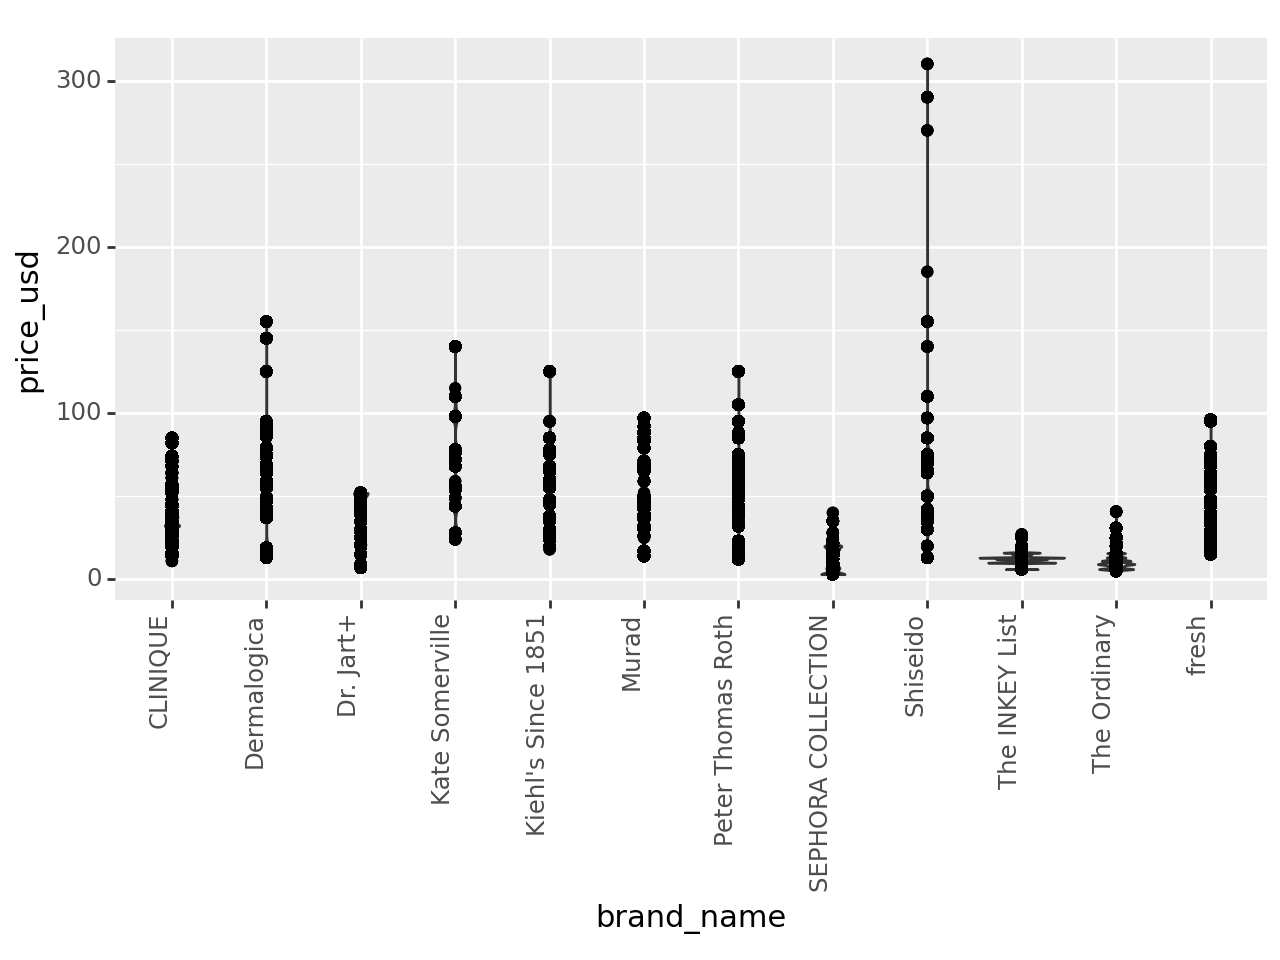

<Figure Size: (640 x 480)>

In [5]:
#
df=util.data_df.copy()
print(df.columns)
# brands that have highest number of products 
brand_product_df=df.groupby(['brand_name'])['product_name'].nunique().sort_values(ascending=False)
### get the brands that sells more or equal than 40 products 
higest_brand_product=brand_product_df[brand_product_df>=40]
# print(higest_brand_product)
## filter all brands that have highest number of products and see there review rating 
res_df=df[df['brand_name'].isin(higest_brand_product.index.to_list())]
# print(res_df.shape)
### to see the review of these brands 
(ggplot(res_df, aes('brand_name', 'price_usd'))
 + geom_violin(res_df)
 + geom_point()
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
)


## Important Points After Data Inspection 
- I noticed that 7 features ('variation_desc','sale_price_usd', 'value_price_usd', 'child_min_price', 'child_max_price', 'helpfulness','review_title') have a large number of missing data during our research. When conducting further analysis on these specific features, it is critical to account for these missing values.

- Furthermore, my findings reveal that the Japanese brand SHISEIDO provides a diverse assortment of products at a variety of pricing points. The INKEY List brand, on the other hand, has a more limited price range and often offers more economical products than SHISEIDO. This knowledge might be useful when comparing brands or researching other possibilities within these brands.

## Descriptive Statistics

- Calculate summary statistics such as mean, median, mode, standard deviation, and percentiles for numerical variables.
- Examine the distribution of numerical variables using histograms or density plots.
- Analyze categorical variables by calculating frequency counts and percentages for each category.

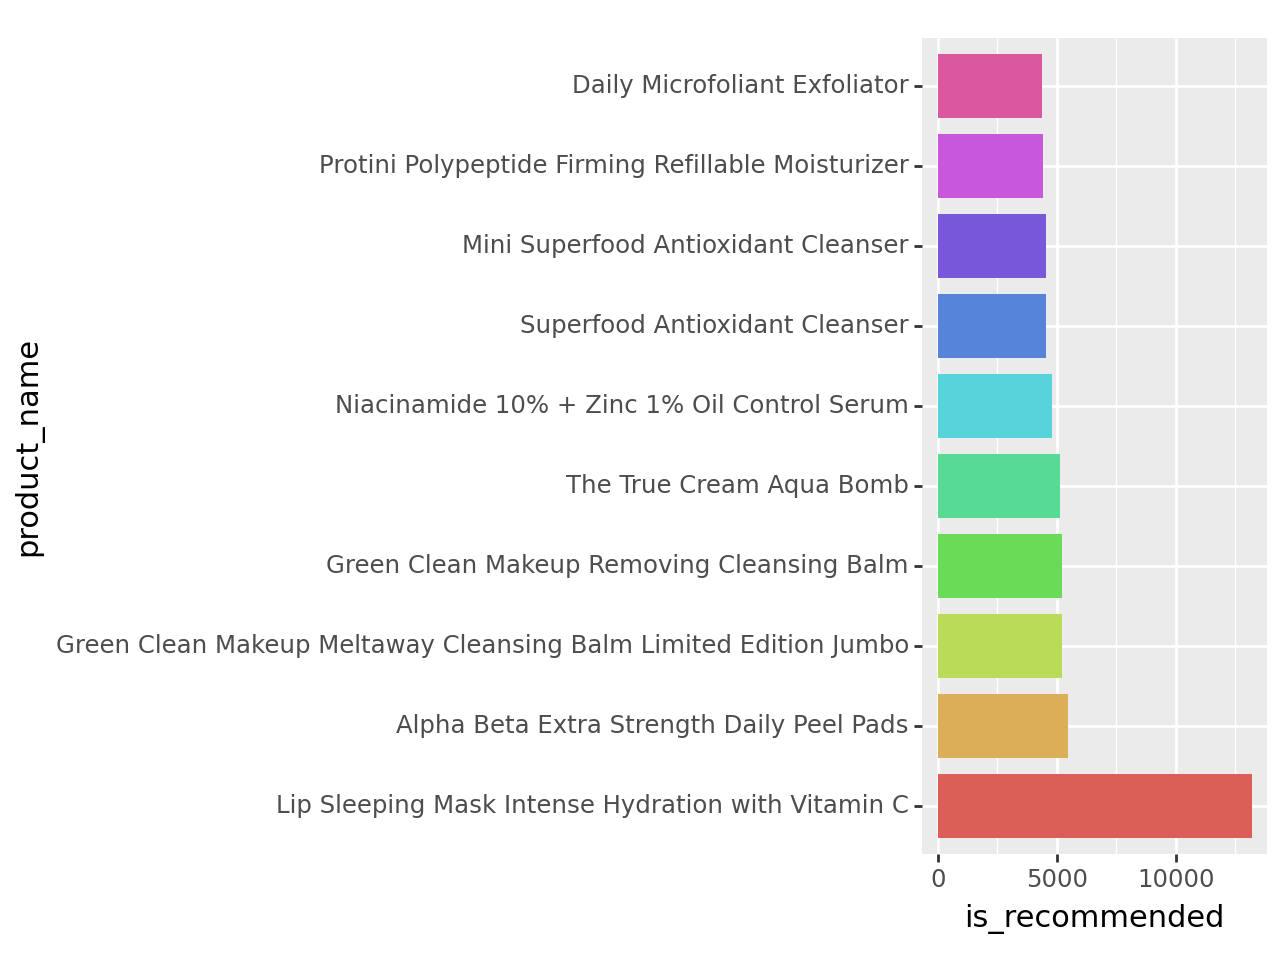

<Figure Size: (640 x 480)>

In [6]:
# get most recomended products 
most_reccomended=util.plot_top_product_candidates(n=10,tcol='is_recommended')
most_reccomended['product_name'] = pd.Categorical(most_reccomended['product_name'],\
        categories=most_reccomended['product_name'].to_list())


(ggplot(most_reccomended, aes(x='product_name', y='is_recommended', fill='product_name')) + \
       geom_bar(stat='identity',position='dodge', width=0.8)+
 coord_flip()+
 theme(legend_position='none')
)



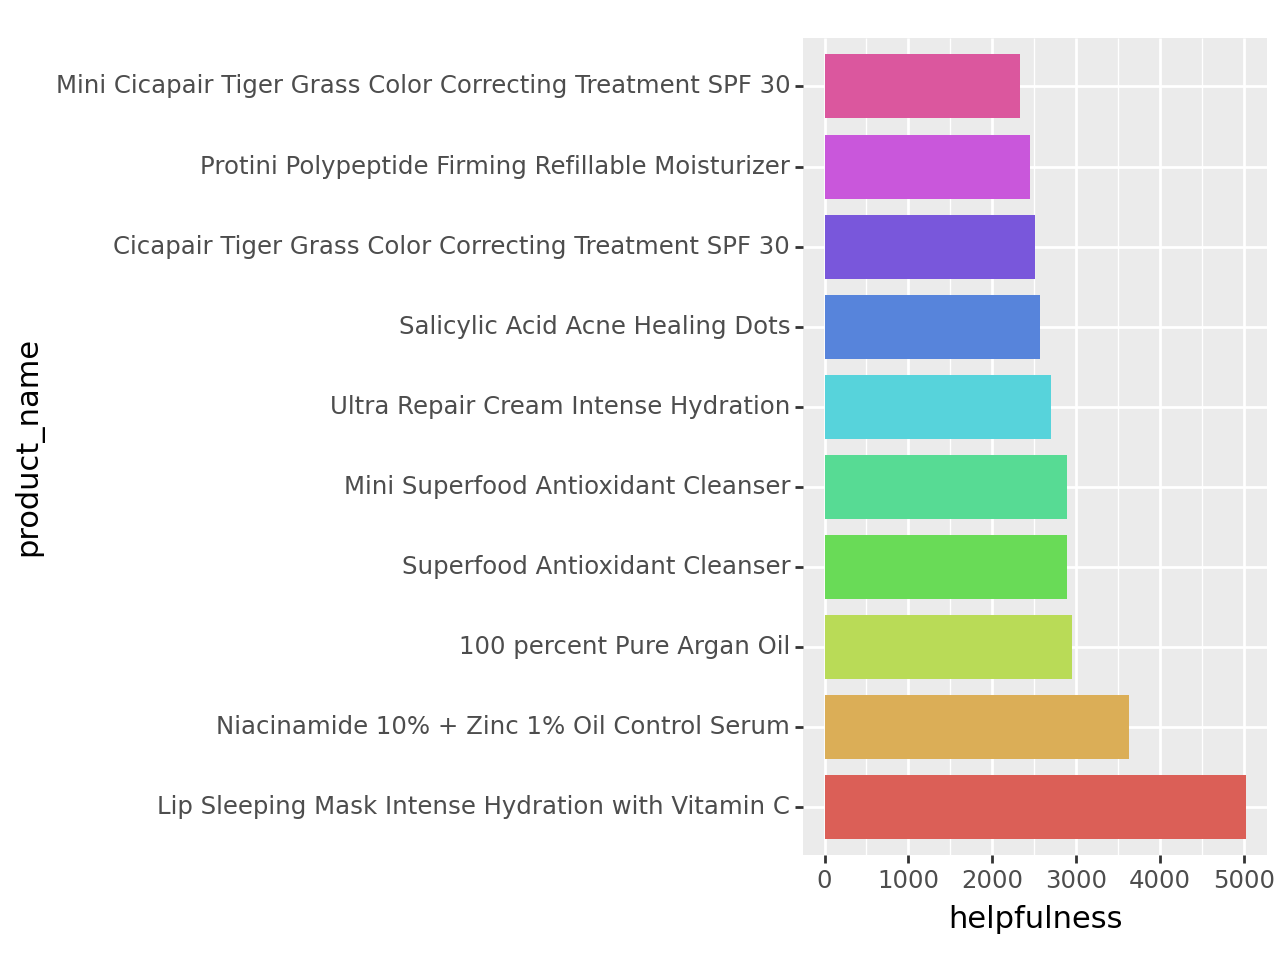

<Figure Size: (640 x 480)>

In [7]:
# get most helpfulness products 
most_reccomended=util.plot_top_product_candidates(n=10,tcol='helpfulness')
most_reccomended['product_name'] = pd.Categorical(most_reccomended['product_name'],\
        categories=most_reccomended['product_name'].to_list())


(ggplot(most_reccomended, aes(x='product_name', y='helpfulness', fill='product_name')) + \
       geom_bar(stat='identity',position='dodge', width=0.8)+
 coord_flip()+
 theme(legend_position='none')
)

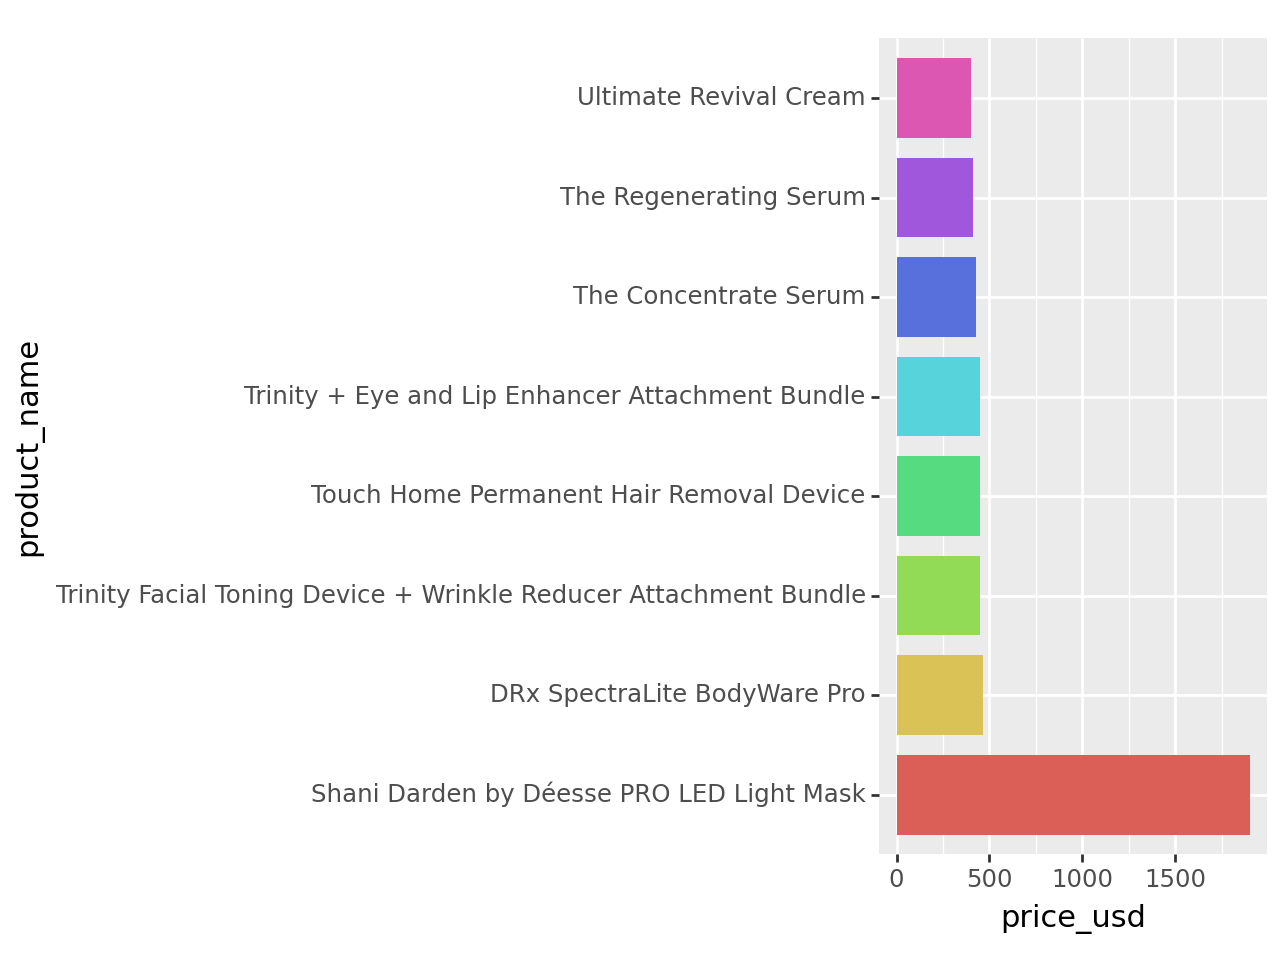

<Figure Size: (640 x 480)>

In [9]:
# get most expansive products 
most_expensive,most_cheap=util.plot_price_based(n=10)
most_expensive['product_name'] = pd.Categorical(most_expensive['product_name'],\
        categories=most_expensive['product_name'].to_list())


(ggplot(most_expensive, aes(x='product_name', y='price_usd', fill='product_name')) + \
       geom_bar(stat='identity',position='dodge', width=0.8)+
 coord_flip()+
 theme(legend_position='none')
)


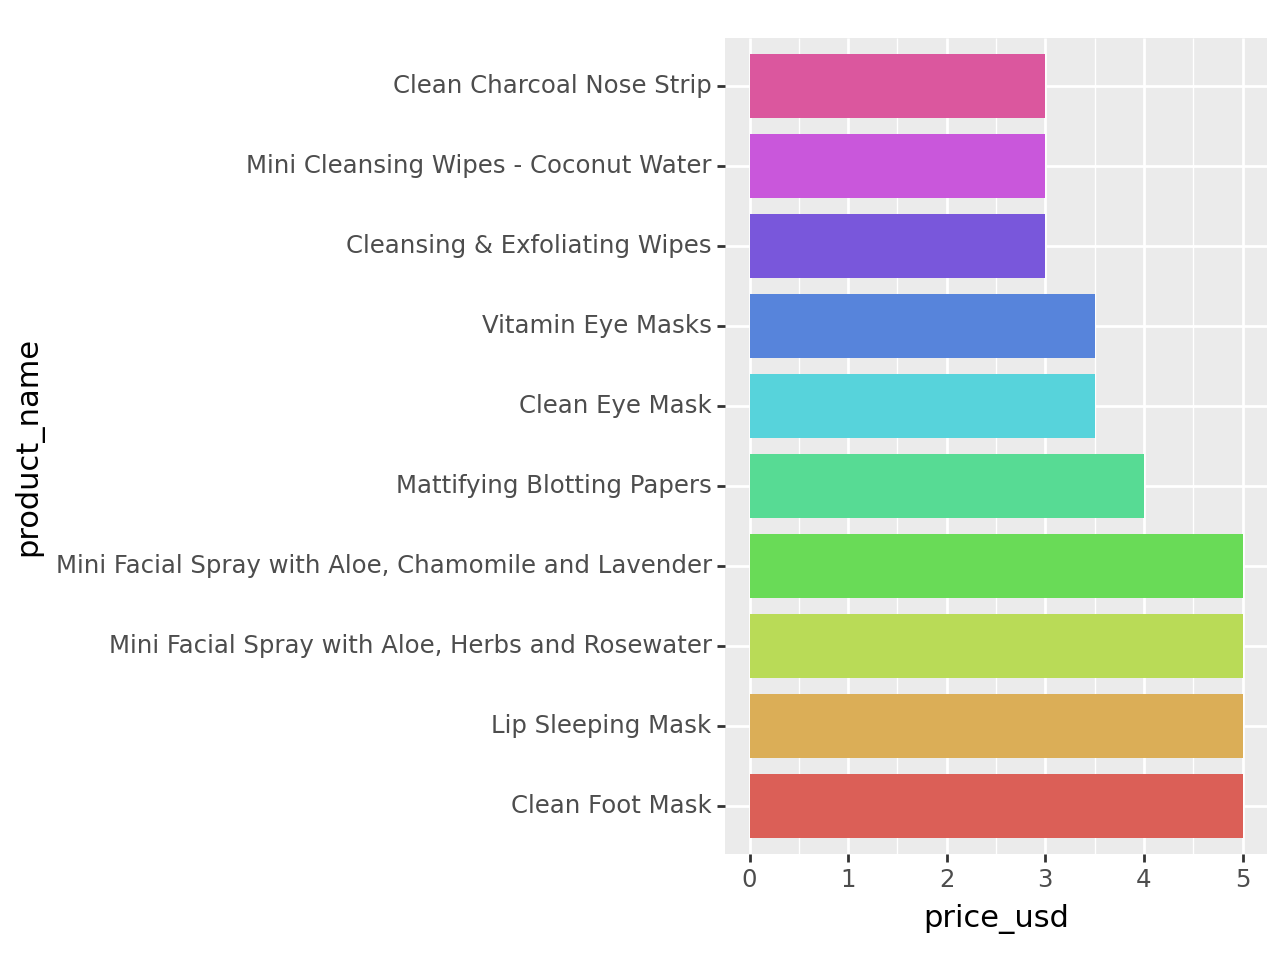

<Figure Size: (640 x 480)>

In [10]:
# get most cheap products 

most_cheap['product_name'] = pd.Categorical(most_cheap['product_name'],\
        categories=most_cheap['product_name'].to_list())


(ggplot(most_cheap, aes(x='product_name', y='price_usd', fill='product_name')) + \
       geom_bar(stat='identity',position='dodge', width=0.8)+
 coord_flip()+
 theme(legend_position='none')
)